# Data Exploration 

In [2]:
import pandas as pd
import numpy as np 
import seaborn as sns 
import matplotlib.pyplot as plt
import json

%matplotlib inline 

In [3]:
import os
from huggingface_hub import login 

 **Load the dataset**

In [4]:
token = os.environ.get("HF_TOKEN")
login(token=token)

In [5]:
from datasets import load_dataset

gretel_dataset = load_dataset("gretelai/synthetic_text_to_sql")

In [6]:
print(gretel_dataset)

DatasetDict({
    train: Dataset({
        features: ['id', 'domain', 'domain_description', 'sql_complexity', 'sql_complexity_description', 'sql_task_type', 'sql_task_type_description', 'sql_prompt', 'sql_context', 'sql', 'sql_explanation'],
        num_rows: 100000
    })
    test: Dataset({
        features: ['id', 'domain', 'domain_description', 'sql_complexity', 'sql_complexity_description', 'sql_task_type', 'sql_task_type_description', 'sql_prompt', 'sql_context', 'sql', 'sql_explanation'],
        num_rows: 5851
    })
})


In [7]:
print(gretel_dataset["train"][0])

{'id': 5097, 'domain': 'forestry', 'domain_description': 'Comprehensive data on sustainable forest management, timber production, wildlife habitat, and carbon sequestration in forestry.', 'sql_complexity': 'single join', 'sql_complexity_description': 'only one join (specify inner, outer, cross)', 'sql_task_type': 'analytics and reporting', 'sql_task_type_description': 'generating reports, dashboards, and analytical insights', 'sql_prompt': 'What is the total volume of timber sold by each salesperson, sorted by salesperson?', 'sql_context': "CREATE TABLE salesperson (salesperson_id INT, name TEXT, region TEXT); INSERT INTO salesperson (salesperson_id, name, region) VALUES (1, 'John Doe', 'North'), (2, 'Jane Smith', 'South'); CREATE TABLE timber_sales (sales_id INT, salesperson_id INT, volume REAL, sale_date DATE); INSERT INTO timber_sales (sales_id, salesperson_id, volume, sale_date) VALUES (1, 1, 120, '2021-01-01'), (2, 1, 150, '2021-02-01'), (3, 2, 180, '2021-01-01');", 'sql': 'SELECT

In [8]:
print(gretel_dataset["test"][0])

{'id': 1, 'domain': 'artificial intelligence', 'domain_description': 'AI data on algorithmic fairness, AI safety, explainable AI, and creative AI applications.', 'sql_complexity': 'basic SQL', 'sql_complexity_description': 'basic SQL with a simple select statement', 'sql_task_type': 'analytics and reporting', 'sql_task_type_description': 'generating reports, dashboards, and analytical insights', 'sql_prompt': "What is the average explainability score of creative AI applications in 'Europe' and 'North America' in the 'creative_ai' table?", 'sql_context': "CREATE TABLE creative_ai (application_id INT, name TEXT, region TEXT, explainability_score FLOAT); INSERT INTO creative_ai (application_id, name, region, explainability_score) VALUES (1, 'ApplicationX', 'Europe', 0.87), (2, 'ApplicationY', 'North America', 0.91), (3, 'ApplicationZ', 'Europe', 0.84), (4, 'ApplicationAA', 'North America', 0.93), (5, 'ApplicationAB', 'Europe', 0.89);", 'sql': "SELECT AVG(explainability_score) FROM creativ

In [9]:
data = gretel_dataset["test"].to_pandas()

In [10]:
data.head()

,id,domain,domain_description,sql_complexity,sql_complexity_description,sql_task_type,sql_task_type_description,sql_prompt,sql_context,sql,sql_explanation
0,1,artificial intelligence,"AI data on algorithmic fairness, AI safety, ex...",basic SQL,basic SQL with a simple select statement,analytics and reporting,"generating reports, dashboards, and analytical...",What is the average explainability score of cr...,"CREATE TABLE creative_ai (application_id INT, ...",SELECT AVG(explainability_score) FROM creative...,This SQL query calculates the average explaina...
1,2,rural development,"Agricultural innovation metrics, rural infrast...",basic SQL,basic SQL with a simple select statement,data manipulation,"inserting, updating, or deleting records",Delete all records of rural infrastructure pro...,"CREATE TABLE rural_infrastructure (id INT, pro...",DELETE FROM rural_infrastructure WHERE country...,This SQL query deletes all records of rural in...
2,3,aerospace,"Aircraft manufacturing data, satellite deploym...",aggregation,"aggregation functions (COUNT, SUM, AVG, MIN, M...",analytics and reporting,"generating reports, dashboards, and analytical...",How many accidents have been recorded for Spac...,"CREATE TABLE Accidents (id INT, launch_provide...","SELECT launch_provider, COUNT(*) FROM Accident...",This query groups the Accidents table by the l...
3,4,aquaculture,"Aquatic farming data, fish stock management, o...",basic SQL,basic SQL with a simple select statement,analytics and reporting,"generating reports, dashboards, and analytical...",What is the maximum quantity of seafood sold i...,"CREATE TABLE sales (id INT, location VARCHAR(2...",SELECT MAX(quantity) FROM sales;,Find the maximum quantity of seafood sold in a...
4,5,entertainment industry,"Audience demographics, viewership trends, cont...",basic SQL,basic SQL with a simple select statement,analytics and reporting,"generating reports, dashboards, and analytical...",What is the total budget for movies released b...,"CREATE TABLE Movies_Release_Year (id INT, titl...",SELECT SUM(budget) FROM Movies_Release_Year WH...,This query calculates the total budget for mov...


In [11]:
print(data.columns.tolist())

['id', 'domain', 'domain_description', 'sql_complexity', 'sql_complexity_description', 'sql_task_type', 'sql_task_type_description', 'sql_prompt', 'sql_context', 'sql', 'sql_explanation']


**EDA**

In [31]:
domain_counts = data["domain"].value_counts().reset_index()
domain_counts = domain_counts[:10]
domain_counts.columns = ["domain", "count"]
print(domain_counts.head())

                  domain  count
0      rural development     86
1                 sports     85
2        water resources     85
3           oceanography     83
4  public transportation     78


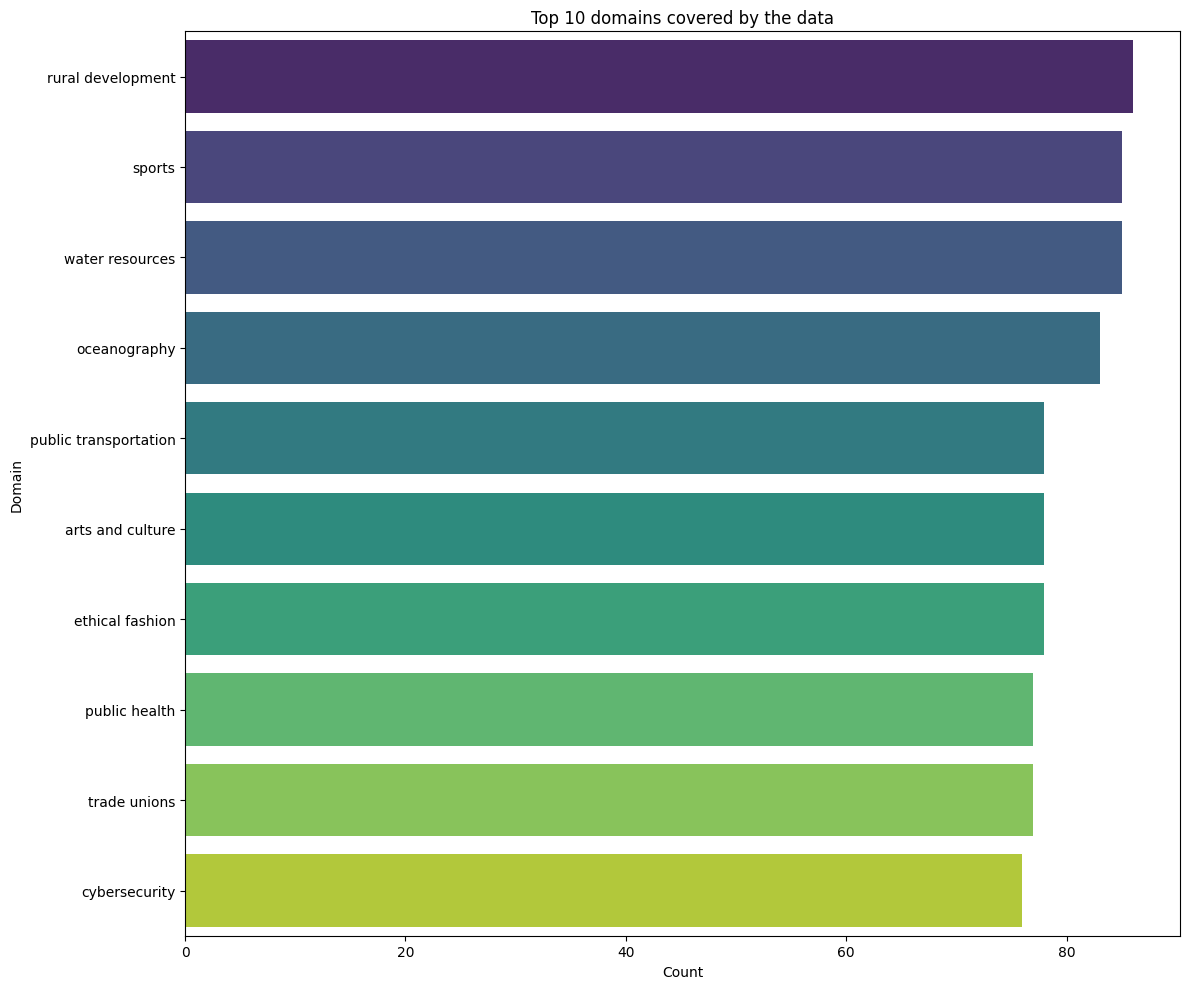

In [36]:
plt.figure(figsize=(12, 10))
sns.barplot(
    data=domain_counts, 
    x="count", 
    y="domain", 
    orient="h", 
    palette="viridis",
    hue="domain",legend = False  
)
plt.title("Top 10 domains covered by the data")
plt.xlabel("Count")
plt.ylabel("Domain")
plt.tight_layout()
plt.show()

In [39]:
sql_operation = data["sql_complexity"].value_counts().reset_index()
sql_operation.columns = ["operation","count"]

In [45]:
sql_operation.head(len(data.columns.tolist()))

,operation,count
0,basic SQL,2869
1,aggregation,1304
2,single join,886
3,subqueries,386
4,window functions,196
5,multiple_joins,139
6,set operations,51
7,CTEs,20


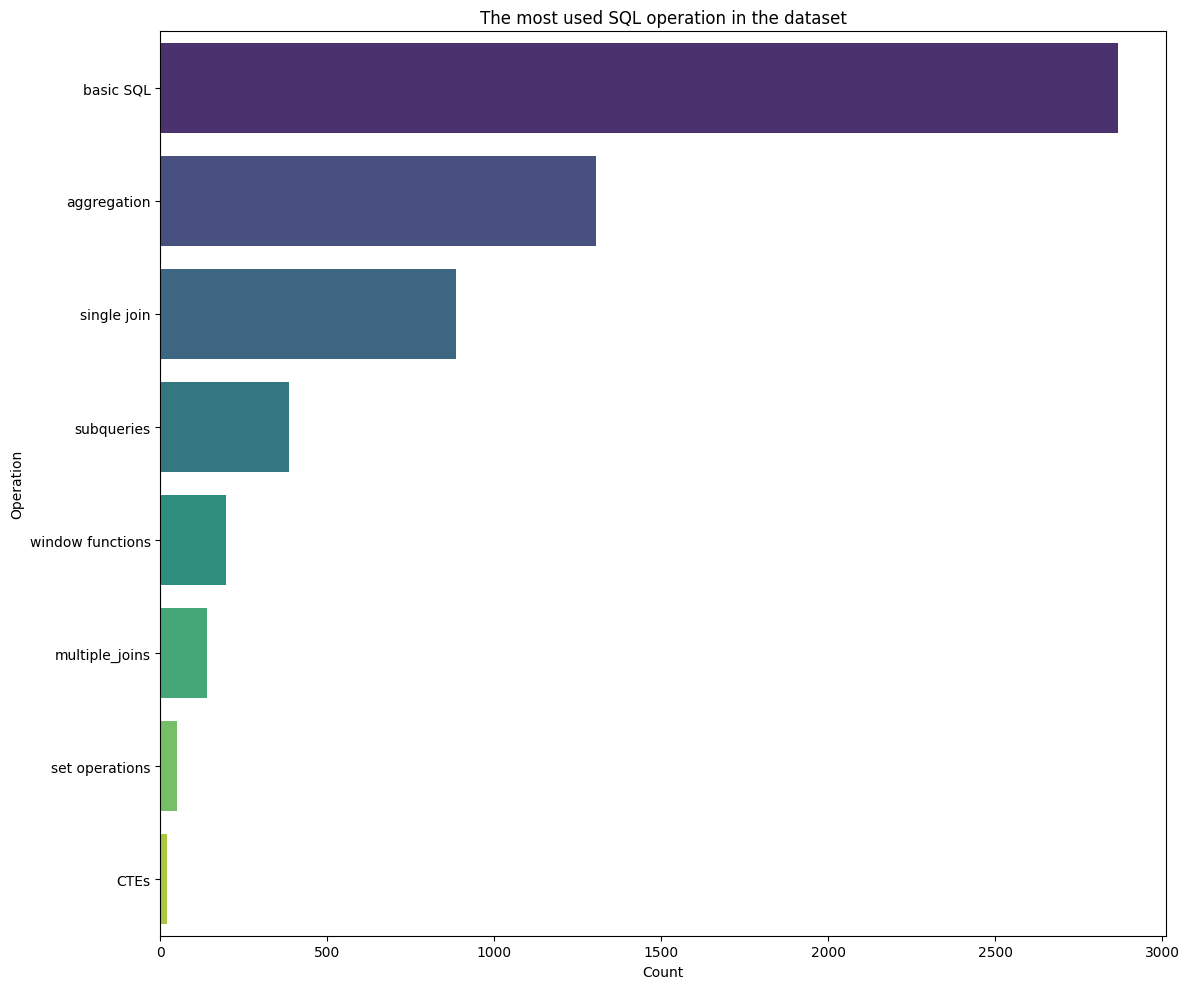

In [56]:
plt.figure(figsize=(12,10))
sns.barplot(
    data=sql_operation, 
    x='count', 
    y="operation", 
    hue="operation",  # Add this line to assign the y variable to hue
    orient="h", 
    palette='viridis',
    legend=False      # Add this to prevent a redundant legend
)
plt.title('The most used SQL operation in the dataset')
plt.xlabel("Count")
plt.ylabel("Operation")
plt.tight_layout()
plt.show()

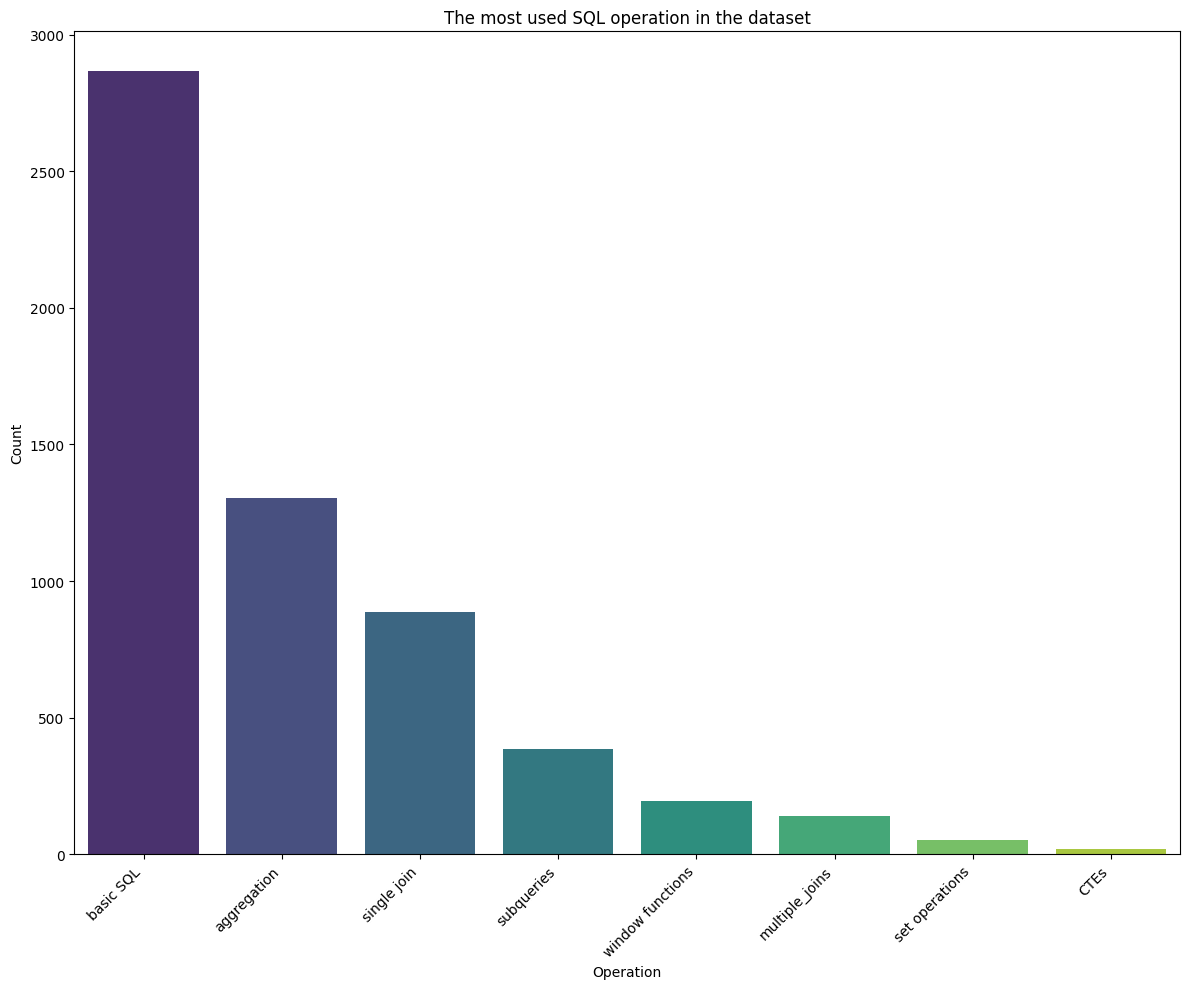

In [57]:
plt.figure(figsize=(12,10))
sns.barplot(
    data=sql_operation, 
    x="operation",  # Swap x and y
    y='count',      # Swap x and y
    hue="operation", 
    orient="v",     # Change to vertical orientation
    palette='viridis',
    legend=False
)
plt.title('The most used SQL operation in the dataset')
plt.xlabel("Operation")  # Swap x and y labels
plt.ylabel("Count")      # Swap x and y labels
plt.xticks(rotation=45, ha='right')  # Rotate x-axis labels for better readability
plt.tight_layout()
plt.show()

In [64]:
sql_tasks = data["sql_task_type"].value_counts().reset_index()
sql_tasks.columns = ["Task Type","count"]

In [67]:
sql_tasks

,Task Type,count
0,analytics and reporting,5148
1,data manipulation,583
2,data retrieval,73
3,data definition,47
